###### Import Libraries

In [1]:
import pandas as pd

import numpy as np

import collections
from collections import Counter #keeps track of how many times equivalent values are added

import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import seaborn as sns
sns.set() #It gives your charts a seaborn background by default

import statsmodels.api as sm

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

import ppscore as pps #Predictive Power Score 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Load Data

In [2]:
# Read csv files

#Plant 1 Cleansed DataFrame
Plant1 = pd.read_csv('P1_NO_NULL.csv')

#Plant 2 Cleansed DataFrame
Plant2 = pd.read_csv('P2_NO_NULL.csv')


# Preview the first 5 lines of the loaded data 
for df in [Plant1, Plant2]:
    print(df.head(), "\n")
    print("_"*80, "\n")

   Unnamed: 0     INVERTER_KEY            DATE_TIME WEATHER_SENSOR_KEY  \
0           0  1BY6WEcLGh8j5v7  2020-05-15 00:00:00    HmiyD2TTLFNqkNe   
1           1  1BY6WEcLGh8j5v7  2020-05-15 00:15:00    HmiyD2TTLFNqkNe   
2           2  1BY6WEcLGh8j5v7  2020-05-15 00:30:00    HmiyD2TTLFNqkNe   
3           3  1BY6WEcLGh8j5v7  2020-05-15 00:45:00    HmiyD2TTLFNqkNe   
4           4  1BY6WEcLGh8j5v7  2020-05-15 01:00:00    HmiyD2TTLFNqkNe   

   IRRADIATION  AMBIENT_TEMPERATURE_F  MODULE_TEMPERATURE_F   PLANT_ID  \
0          0.0              77.331769             73.143513  4135001.0   
1          0.0              77.152260             72.971002  4135001.0   
2          0.0              76.884355             72.666150  4135001.0   
3          0.0              76.723035             72.249534  4135001.0   
4          0.0              76.318746             71.897761  4135001.0   

   DC_POWER  AC_POWER  ...                 DATE      TIME HOUR DAY  WEEKDAY  \
0       0.0       0.0  ...  202

In [3]:
# identify data type for each column

for df in [Plant1, Plant2]:
    print(df.info(), "\n")
    print("*"*80, "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71804 entries, 0 to 71803
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             71804 non-null  int64  
 1   INVERTER_KEY           71804 non-null  object 
 2   DATE_TIME              71804 non-null  object 
 3   WEATHER_SENSOR_KEY     71804 non-null  object 
 4   IRRADIATION            71804 non-null  float64
 5   AMBIENT_TEMPERATURE_F  71804 non-null  float64
 6   MODULE_TEMPERATURE_F   71804 non-null  float64
 7   PLANT_ID               71804 non-null  float64
 8   DC_POWER               71804 non-null  float64
 9   AC_POWER               71804 non-null  float64
 10  DAILY_YIELD            71804 non-null  float64
 11  TOTAL_YIELD            71804 non-null  float64
 12  DATE                   71804 non-null  object 
 13  TIME                   71804 non-null  object 
 14  HOUR                   71804 non-null  int64  
 15  DA

In [4]:
#drop Unnamed: 0 column

Plant1 = Plant1.drop(columns=['Unnamed: 0'])
Plant2 = Plant2.drop(columns=['Unnamed: 0'])

In [5]:
#Validate drop

for df in [Plant1, Plant2]:
    print(df.info(), "\n")
    print("*"*80, "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71804 entries, 0 to 71803
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INVERTER_KEY           71804 non-null  object 
 1   DATE_TIME              71804 non-null  object 
 2   WEATHER_SENSOR_KEY     71804 non-null  object 
 3   IRRADIATION            71804 non-null  float64
 4   AMBIENT_TEMPERATURE_F  71804 non-null  float64
 5   MODULE_TEMPERATURE_F   71804 non-null  float64
 6   PLANT_ID               71804 non-null  float64
 7   DC_POWER               71804 non-null  float64
 8   AC_POWER               71804 non-null  float64
 9   DAILY_YIELD            71804 non-null  float64
 10  TOTAL_YIELD            71804 non-null  float64
 11  DATE                   71804 non-null  object 
 12  TIME                   71804 non-null  object 
 13  HOUR                   71804 non-null  int64  
 14  DAY                    71804 non-null  int64  
 15  WE

### Build data profile tables and plots

###### Reviewing summary statistics

In [6]:
#summary stats table transposed for df

pd.options.display.float_format = '{:.5f}'.format
#Assign display.float_format with pandas option to change float format and suppresses scientific notation
    

for df in [Plant1, Plant2]:
    print(df.describe().T) #property T is an accessor to the method transpose()
    print("*"*80, "\n")

                            count          mean          std           min  \
IRRADIATION           71804.00000       0.22624      0.29974       0.00000   
AMBIENT_TEMPERATURE_F 71804.00000      77.90814      6.04652      68.71731   
MODULE_TEMPERATURE_F  71804.00000      87.86837     21.97257      64.65275   
PLANT_ID              71804.00000 4135001.00000      0.00000 4135001.00000   
DC_POWER              71804.00000    3063.73698   4008.54602       0.00000   
AC_POWER              71804.00000     299.61335    391.66981       0.00000   
DAILY_YIELD           71804.00000    3243.75665   3140.18699       0.00000   
TOTAL_YIELD           71804.00000 6976600.14244 416071.87752 6183645.00000   
HOUR                  71804.00000      11.50064      6.92190       0.00000   
DAY                   71804.00000      16.00006      8.54430       1.00000   
MONTH                 71804.00000       5.50003      0.50000       5.00000   
YEAR                  71804.00000    2020.00000      0.00000    

In [7]:
# 'DATE_TIME', 'HOUR', 'DAY', 'MONTH', 'YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID', 'INVERTER_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'WEATHER_SENSOR_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'

Data Visualization of Variable Distributions

Univariate Analysis

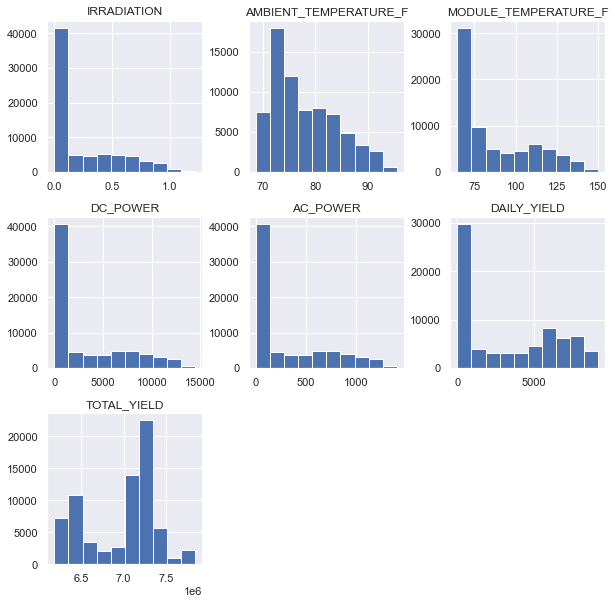

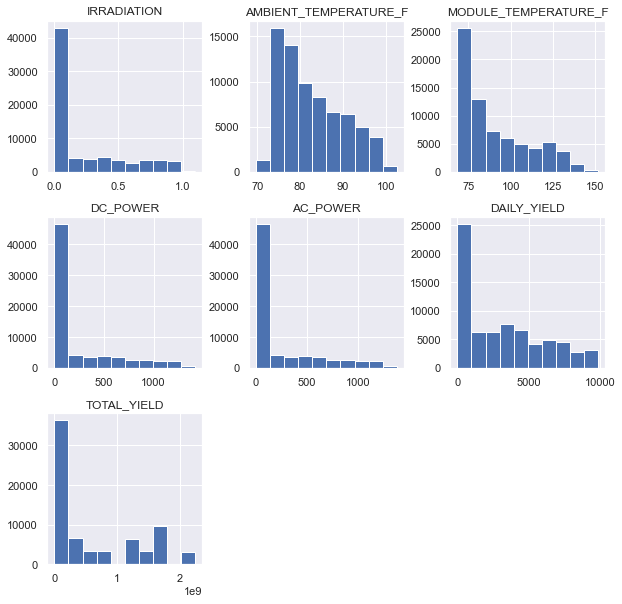

In [8]:
#histograms for each variable in df

for df in [Plant1, Plant2]:
    df.drop(columns=['DATE_TIME','HOUR', 'DAY', 'MONTH', 'YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID',]).hist(bins=10,figsize =(10,10))
    


For Plant 1, DC POWER, AC POWER, and DAILY YIELD skew right (positively skewed). TOTAL YIELD is Non-symmetric, bimodal with a slightly left skew.

For Plant 2 DC POWER, AC POWER, DAILY YIELD, and TOTAL YIELD skew right (positively skewed).

For Plant 1 and 2, AMBIENT_TEMPERATURE, MODULE_ TEMPERTURE, IRRADIATION skew right (positively skewed). TOTAL YIELD is Non-symmetric, bimodal with a slightly left skew.

###### Reviewing for Outliers and Anamolies

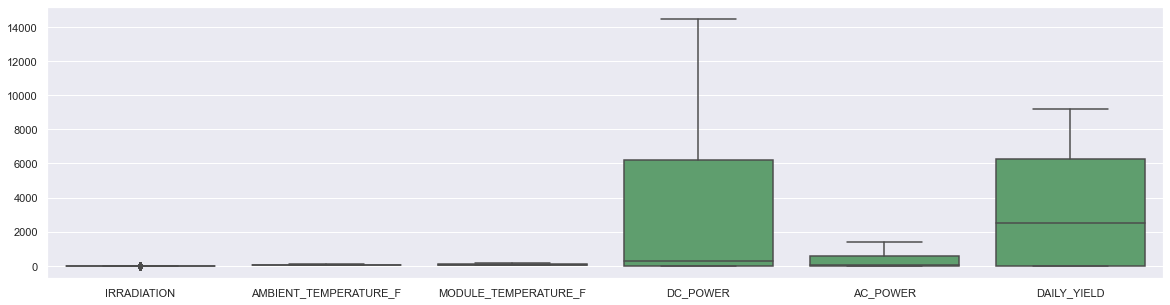

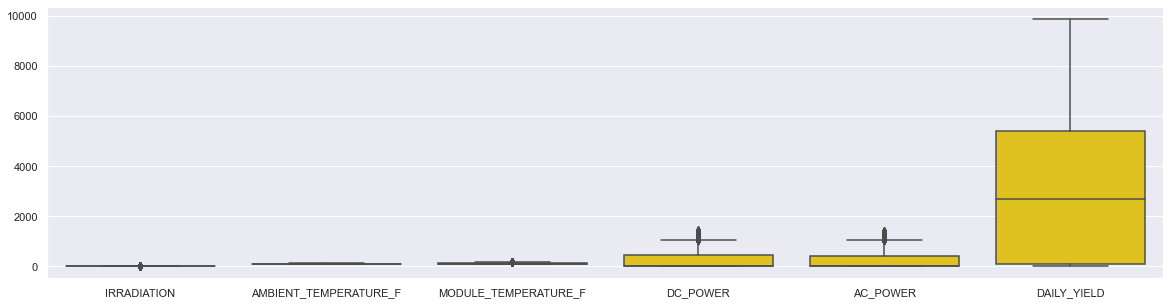

In [9]:
# Boxplot to identify features with outliers

plt.rcParams['figure.figsize'] = (20,5)
sns.boxplot(data=Plant1.drop(columns=['TOTAL_YIELD', 'DATE_TIME', 'HOUR', 'DAY', 'MONTH', 'YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']), color ='g')
plt.show()

plt.rcParams['figure.figsize'] = (20,5)
sns.boxplot(data=Plant2.drop(columns=['TOTAL_YIELD', 'DATE_TIME', 'HOUR', 'DAY', 'MONTH', 'YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']), color ='gold')
plt.show()

#seaborn.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)



Plant 1 appears to have outliers for AC Power, DC Power, and Irradiation.

Plant 2 appears to have outliers for AC Power, DC Power, Module Temperature, and Irradiation.

In [10]:
#Plant 1

#Q1
P1_Q1 = Plant1.quantile(0.25)

#Q3
P1_Q3 = Plant1.quantile(0.75)

#IQR
Plant1_IQR = P1_Q3-P1_Q1

print(Plant1_IQR)

IRRADIATION                  0.44657
AMBIENT_TEMPERATURE_F        9.39494
MODULE_TEMPERATURE_F        35.97383
PLANT_ID                     0.00000
DC_POWER                  6211.50893
AC_POWER                   608.39196
DAILY_YIELD               6238.55357
TOTAL_YIELD             753366.00000
HOUR                        12.00000
DAY                         14.00000
MONTH                        1.00000
YEAR                         0.00000
DC_ZERO_POWER                1.00000
ZERO_IRRADIATION             1.00000
ZERO_DAYLIGHT                1.00000
dtype: float64


In [11]:
#Plant 21

#Q1
P2_Q1 = Plant2.quantile(0.25)

#Q3
P2_Q3 = Plant2.quantile(0.75)

#IQR
Plant2_IQR = P2_Q3-P2_Q1

print(Plant2_IQR)

IRRADIATION                      0.40309
AMBIENT_TEMPERATURE_F           11.89585
MODULE_TEMPERATURE_F            30.19912
PLANT_ID                         0.00000
DC_POWER                       417.76833
AC_POWER                       410.12500
DAILY_YIELD                   5323.40476
TOTAL_YIELD             1328450691.00000
HOUR                            11.50000
DAY                             14.00000
MONTH                            1.00000
YEAR                             0.00000
DC_ZERO_POWER                    1.00000
ZERO_IRRADIATION                 1.00000
ZERO_DAYLIGHT                    1.00000
dtype: float64


In [12]:
#Plant 1

Plant1_WITH_OUTLIERS = Plant1.drop(columns=['DATE_TIME', 'DATE', 'DAY', 'MONTH', 'YEAR'], axis=1)

Plant1_NO_OUTLIERS = Plant1_WITH_OUTLIERS[~((Plant1_WITH_OUTLIERS < (P1_Q1 - 1.5 * Plant1_IQR)) |(Plant1_WITH_OUTLIERS > (P1_Q3 + 1.5 * Plant1_IQR))).any(axis=1)]

print("There are " + str(len(Plant1_WITH_OUTLIERS)) + " entries.") 

print("When Outliers are removed, there are " + str(len(Plant1_NO_OUTLIERS)) + " entries.")
print("The proportion of non-outliers that exists in the dataset is " + str(len(Plant1_NO_OUTLIERS)/len(Plant1_WITH_OUTLIERS)))


There are 71804 entries.
When Outliers are removed, there are 71738 entries.
The proportion of non-outliers that exists in the dataset is 0.9990808311514678


In [13]:
#Plant 2

Plant2_WITH_OUTLIERS = Plant2.drop(columns=['DATE_TIME', 'DATE', 'DAY', 'MONTH', 'YEAR'], axis=1)

Plant2_NO_OUTLIERS = Plant2_WITH_OUTLIERS[~((Plant2_WITH_OUTLIERS < (P2_Q1 - 1.5 * Plant2_IQR)) |(Plant2_WITH_OUTLIERS > (P2_Q3 + 1.5 * Plant2_IQR))).any(axis=1)]

print("There are " + str(len(Plant2_WITH_OUTLIERS)) + " entries.") 

print("When Outliers are removed, there are " + str(len(Plant2_NO_OUTLIERS)) + " entries.")
print("The proportion of non-outliers that exists in the dataset is " + str(len(Plant2_NO_OUTLIERS)/len(Plant2_WITH_OUTLIERS)))


There are 71808 entries.
When Outliers are removed, there are 67481 entries.
The proportion of non-outliers that exists in the dataset is 0.9397420900178253


After adding rows for missing DATE_TIME and filling missing values, outliers make up less than 8% of Plant 2 Data and far less than 1% of Plant 1 Data.

## Explore data relationships

Bi-variate Analysis - Identify strength of relationship among features

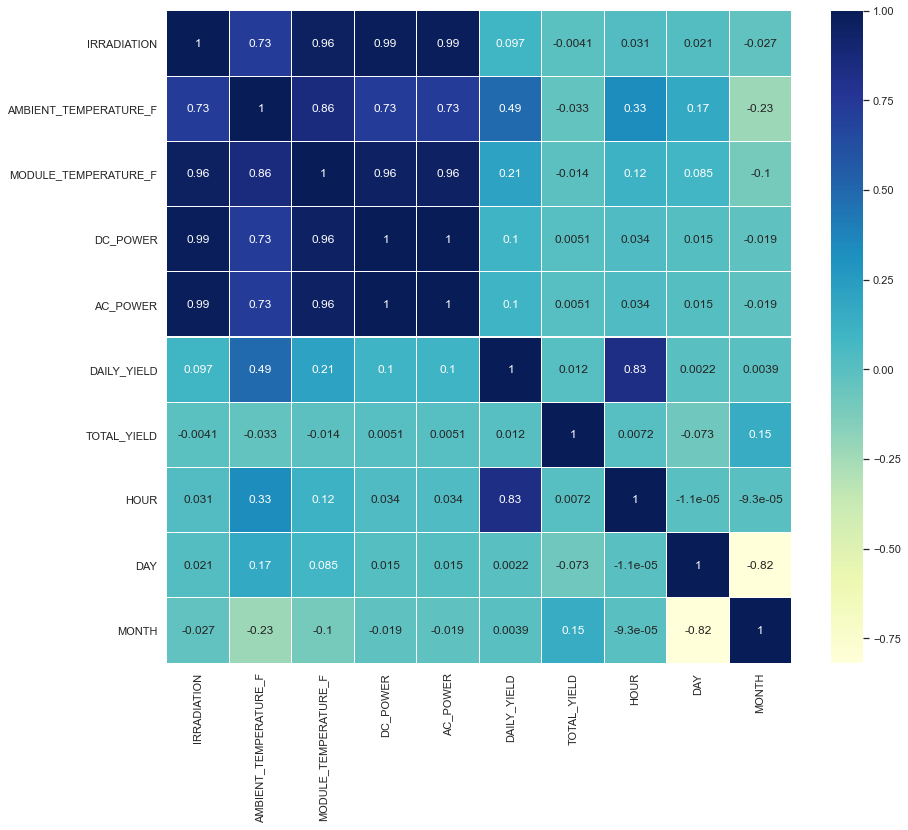

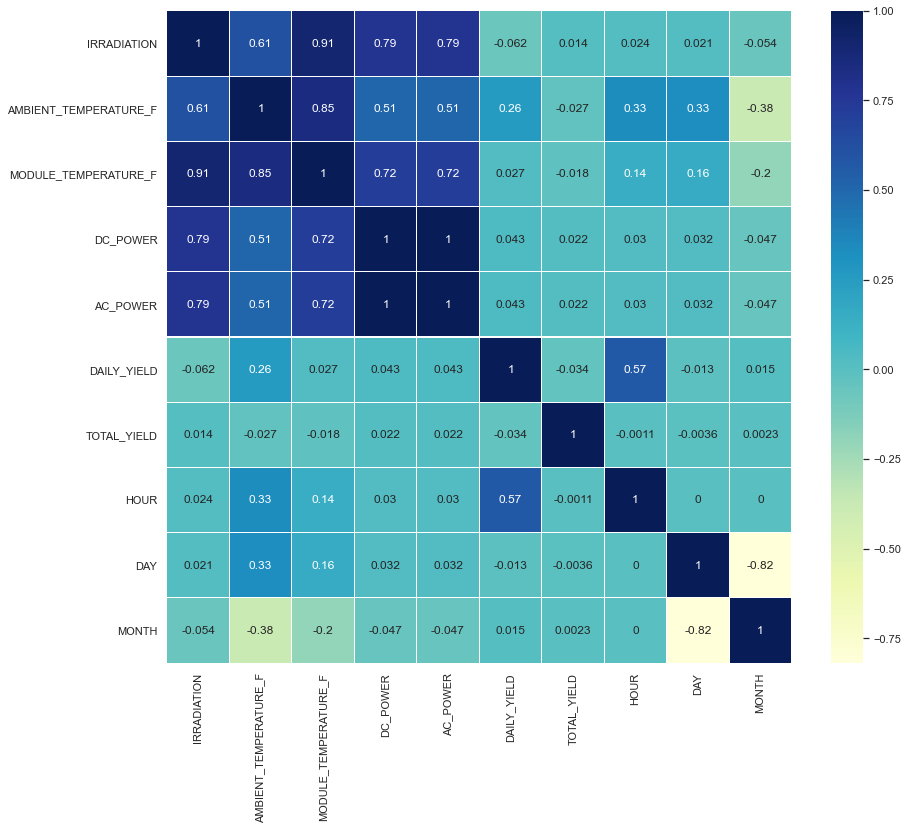

In [14]:
#create the correlation matrix heat map

for df in [Plant1, Plant2]:
    plt.figure(figsize=(14,12))
    sns.heatmap(df.drop(columns=['YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']).corr(),linewidths=.1,cmap="YlGnBu", annot=True)
    plt.yticks(rotation=0);

Plant 1 has strong correlation between DC_POWER and IRRADIATION, AMBIENT_TEMPERATURE_F, and MODULE_TEMPERATURE_F with 0.99, 0.73, and 0.96 respective Pearson product-moment correlation coefficient. 

Plant 2 has strong (less strength than plant 1) correlation between DC_POWER and IRRADIATION, AMBIENT_TEMPERATURE_F, and MODULE_TEMPERATURE_F with 0.79, 0.51, and 0.72 respective correlation coefficient. 

Predictive Power Score (PPS)

In [ ]:
#Predictive Power Score (PPS) - DC POWER

#Plant 1
print('Plant 1 DC POWER')
predictors_P1_CORR__DC = pps.predictors(Plant1.drop(columns=['YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']), "DC_POWER")
print(predictors_P1_CORR__DC)
print("_"*80, "\n")

#Plant 2
print('Plant 2 DC POWER')
predictors_P2_CORR__DC = pps.predictors(Plant2.drop(columns=['YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']), "DC_POWER")
print(predictors_P2_CORR__DC)



#Plot DC_POWER PPS 

#set figure size by passing dictionary to rc parameter with key 'figure.figsize' in seaborn
#sns.set(rc={'figure.figsize':(15,10)})

barplot = sns.barplot(data=predictors_P1_CORR__DC, x="x", y="ppscore")
loc, labels = plt.xticks()
barplot.set_xticklabels(labels, rotation=90)
barplot.set(xlabel='feature', ylabel='ppscore')
plt.show()
print("_"*80, "\n")

barplot = sns.barplot(data=predictors_P2_CORR__DC, x="x", y="ppscore")
loc, labels = plt.xticks()
barplot.set_xticklabels(labels, rotation=90)
barplot.set(xlabel='feature', ylabel='ppscore')
plt.show()


Plant 1 DC POWER


In [ ]:
#Predictive Power Score (PPS) - DC_ZERO_POWER

#Plant 1
print('Plant 1 DC ZERO POWER')
predictors_P1_CORR_ZERO_DC = pps.predictors(Plant1.drop(columns=['YEAR', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']), "DC_ZERO_POWER")
print(predictors_P1_CORR_ZERO_DC)
print("_"*80, "\n")

#Plant 2
print('Plant 2 DC ZERO POWER')
predictors_P2_CORR_ZERO_DC = pps.predictors(Plant2.drop(columns=['YEAR', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']), "DC_ZERO_POWER")
print(predictors_P2_CORR_ZERO_DC)
      
    
    
#Plot DC_ZERO_POWER PPS 

barplot = sns.barplot(data=predictors_P1_CORR_ZERO_DC, x="x", y="ppscore")
loc, labels = plt.xticks()
barplot.set_xticklabels(labels, rotation=90)
barplot.set(xlabel='feature', ylabel='ppscore')
plt.show()
print("_"*80, "\n")

barplot = sns.barplot(data=predictors_P2_CORR_ZERO_DC, x="x", y="ppscore")
loc, labels = plt.xticks()
barplot.set_xticklabels(labels, rotation=90)
barplot.set(xlabel='feature', ylabel='ppscore')
plt.show()

For both plants DC Power is strongly correlated to AC_POWER (no surprise there), IRRADIATION, MODULE_TEMPERATURE_F, TIME, HOUR, AMBIENT_TEMPERATURE_F, and DATE_TIME. 

IRRADIATION and MODULE_TEMPERATURE_F might be a good predictor of the outcome variable.

Pair plots

In [ ]:
#pair plots

for df in [Plant1, Plant2]:
    sns.pairplot(df.drop(columns=['YEAR', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']))
    plt.show()

Identification and creation of features

In [ ]:
P1_ADDED_FEATURES = Plant1.copy()
P2_ADDED_FEATURES = Plant2.copy()

In [ ]:
# Daily Yield changed to Cumulative Daily Yield

for df in [P1_ADDED_FEATURES, P2_ADDED_FEATURES]:
    df.sort_values(['INVERTER_KEY', 'DATE_TIME'], ascending=True, inplace=True)
    df.rename(columns={"DAILY_YIELD": "CUMULATIVE_DAILY_YIELD"}, inplace=True)

In [ ]:
 # 15 minute level (1 per row)
    
for df in [P1_ADDED_FEATURES, P2_ADDED_FEATURES]:    
    df['DC/AC_RATIO'] = np.where(df['AC_POWER'] == 0, 0, df['DC_POWER']/df['AC_POWER'])
    df['YIELD'] = df['CUMULATIVE_DAILY_YIELD'].diff().fillna(0)
    INVERTER_KEY_MASK = df['INVERTER_KEY'] != df['INVERTER_KEY'].shift(1)
    DAY_MASK = df['DATE'] != df['DATE'].shift(1)
    df.loc[INVERTER_KEY_MASK, 'YIELD'] = 0
    df.loc[DAY_MASK, 'YIELD'] = 0


Yield min is negative 

In [ ]:
# hour level (1 per hour per inverter)

for df in [P1_ADDED_FEATURES, P2_ADDED_FEATURES]:   
    df['HOURLY_DC_AVG'] = df.groupby(['INVERTER_KEY', 'HOUR'])['DC_POWER'].transform(func=np.mean)
    df['HOURLY_AC_AVG'] = df.groupby(['INVERTER_KEY', 'HOUR'])['AC_POWER'].transform(func=np.mean)
    df['HOURLY_YIELD'] = df.groupby(['INVERTER_KEY', 'HOUR'])['YIELD'].transform(func=np.sum)

Hourly Yield min is negative 

In [ ]:
# day level (1 per day per inverter)

for df in [P1_ADDED_FEATURES, P2_ADDED_FEATURES]:    
    df['DAILY_DC_AVG'] = df.groupby(['INVERTER_KEY', 'DATE'])['DC_POWER'].transform(func=np.mean)
    df['DAILY_AC_AVG'] = df.groupby(['INVERTER_KEY', 'DATE'])['AC_POWER'].transform(func=np.mean)
    df['DAILY_DC/AC_RATIO_AVG'] = df.groupby(['INVERTER_KEY', 'DATE'])['DC/AC_RATIO'].transform(func=np.mean)
    # daily_yield is cumulative, so the final value, when grouped by inverter and date, is the total daily yield
    df['DAILY_YIELD_TOTAL'] = df.groupby(['INVERTER_KEY', 'DATE'])['CUMULATIVE_DAILY_YIELD'].transform(func='last')

In [ ]:
# inverter level (1 per inverter)
    
for df in [P1_ADDED_FEATURES, P2_ADDED_FEATURES]:    
    df['DAILY_YIELD_AVG'] = df.groupby(['INVERTER_KEY'])['DAILY_YIELD_TOTAL'].transform(func=np.mean)

In [ ]:
# validate features
P1_ADDED_FEATURES.describe().T

In [ ]:
#create the correlation matrix heat map

for df in [P1_ADDED_FEATURES, P2_ADDED_FEATURES]:
    plt.figure(figsize=(14,12))
    sns.heatmap(df.drop(columns=['YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']).corr(),linewidths=.1,cmap="YlGnBu", annot=True)
    plt.yticks(rotation=0);

In [ ]:
#Predictive Power Score (PPS) - DC POWER

#Plant 1
print('Plant 1 DC POWER')
predictors_P1_AF_CORR__DC = pps.predictors(P1_ADDED_FEATURES.drop(columns=['YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']), "DC_POWER")
print(predictors_P1_AF_CORR__DC)
print("_"*80, "\n")

#Plant 2
print('Plant 2 DC POWER')
predictors_P2_AF_CORR__DC = pps.predictors(P2_ADDED_FEATURES.drop(columns=['YEAR', 'DC_ZERO_POWER', 'ZERO_IRRADIATION', 'ZERO_DAYLIGHT', 'PLANT_ID']), "DC_POWER")
print(predictors_P2_AF_CORR__DC)



#Plot DC_POWER PPS 

#set figure size by passing dictionary to rc parameter with key 'figure.figsize' in seaborn
#sns.set(rc={'figure.figsize':(15,10)})

barplot = sns.barplot(data=predictors_P1_AF_CORR__DC, x="x", y="ppscore")
loc, labels = plt.xticks()
barplot.set_xticklabels(labels, rotation=90)
barplot.set(xlabel='feature', ylabel='ppscore')
plt.show()
print("_"*80, "\n")

barplot = sns.barplot(data=predictors_P2_AF_CORR__DC, x="x", y="ppscore")
loc, labels = plt.xticks()
barplot.set_xticklabels(labels, rotation=90)
barplot.set(xlabel='feature', ylabel='ppscore')
plt.show()


After adding features I will most likely drop all except Hourly DC and AC averages. These shows high coorleation and can be used a predictor for failure. 

In [ ]:
Plant1_EDA = P1_ADDED_FEATURES.drop(columns=['YEAR', 'HOURLY_YIELD', 'YIELD', 'ZERO_DAYLIGHT', 'PLANT_ID', 'HOURLY_AC_AVG', 'TOTAL_YIELD', 'WEATHER_SENSOR_KEY', 'DAY', 'WEEKDAY', 'MONTH', 'DAILY_DC_AVG', 'DAILY_AC_AVG', 'DAILY_DC/AC_RATIO_AVG', 'DAILY_YIELD_TOTAL'])

Plant2_EDA = P2_ADDED_FEATURES.drop(columns=['YEAR', 'HOURLY_YIELD', 'YIELD', 'ZERO_DAYLIGHT', 'PLANT_ID', 'HOURLY_AC_AVG', 'TOTAL_YIELD', 'WEATHER_SENSOR_KEY', 'DAY', 'WEEKDAY', 'MONTH', 'DAILY_DC_AVG', 'DAILY_AC_AVG', 'DAILY_DC/AC_RATIO_AVG', 'DAILY_YIELD_TOTAL'])

In [ ]:
# Inverter level analysis

In [ ]:
# convert date-times to pandas datetime format

Plant1_EDA['DATE_TIME']= pd.to_datetime(Plant1_EDA['DATE_TIME'],format= '%Y-%m-%d %H:%M:%S')
Plant2_EDA['DATE_TIME']= pd.to_datetime(Plant2_EDA['DATE_TIME'],format= '%Y-%m-%d %H:%M:%S')

In [ ]:
#Power converted by Plant 1

P1_EC = Plant1_EDA.copy()

P1_EC 

P1_EC['DATE']=P1_EC['DATE_TIME'].dt.date
P1_EC=P1_EC.groupby('DATE').sum()
P1_EC['Energy Conversion']=P1_EC['AC_POWER']/P1_EC['DC_POWER']*100

P1_EC['Energy Conversion'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('Plant 1 % of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='green')
plt.axhline(P1_EC['Energy Conversion'].mean(),linestyle='--',color='gray',label='mean')
plt.legend()
plt.show()

In [ ]:
#Power converted by Plant 2

P2_EC = Plant2_EDA.copy()

P2_EC['DATE']=P2_EC['DATE_TIME'].dt.date
P2_EC=P2_EC.groupby('DATE').sum()
P2_EC['Energy Conversion']=P2_EC['AC_POWER']/P2_EC['DC_POWER']*100

P2_EC['Energy Conversion'].plot(style='o--',figsize=(17,5),label='Real Power')

plt.title('Plant 2 % of DC power converted in AC power',size=17)
plt.ylabel('DC power converted (%)',fontsize=14,color='green')
plt.axhline(P2_EC['Energy Conversion'].mean(),linestyle='--',color='gray',label='mean')
plt.legend()
plt.show()

Insights - Solar Cell Efficiency

Plant 2 is more efficient in energy conversion. More than 95% of DC is conbverted into AC vs less than 10% for Plant 1.

Plant 1 need maintenance or replacement.

In [ ]:
P1_INVETERTERS =Plant1_EDA.copy()
P1_INVETERTERS['TIME']=P1_INVETERTERS['DATE_TIME'].dt.time
P1_INVETERTERS.set_index('TIME').groupby('INVERTER_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power during day for all sources',size=17)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=17)
plt.show()

In [ ]:
P2_INVETERTERS =Plant2_EDA.copy()
P2_INVETERTERS['TIME']=P2_INVETERTERS['DATE_TIME'].dt.time
P2_INVETERTERS.set_index('TIME').groupby('INVERTER_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power during day for all sources',size=17)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=17)
plt.show()

#### Which inverter is underperforming?

In [ ]:
P1_CHART_DC_D = Plant1_EDA.groupby(['DATE','INVERTER_KEY'])['DC_POWER'].sum().unstack()
P1_CHART_TY_D = Plant1_EDA.groupby(['DATE','INVERTER_KEY'])['HOURLY_DC_AVG'].sum().unstack()

P2_CHART_DC_D = Plant2_EDA.groupby(['DATE','INVERTER_KEY'])['DC_POWER'].sum().unstack()
P2_CHART_TY_D = Plant2_EDA.groupby(['DATE','INVERTER_KEY'])['HOURLY_DC_AVG'].sum().unstack()

P1_CHART_ZERO_D = Plant1_EDA.groupby(['DATE','INVERTER_KEY'])['DC_ZERO_POWER'].sum().unstack()
P2_CHART_ZERO_D = Plant1_EDA.groupby(['DATE','INVERTER_KEY'])['DC_ZERO_POWER'].sum().unstack()


P1_CHART_DC_T = Plant1_EDA.groupby(['TIME','INVERTER_KEY'])['DC_POWER'].sum().unstack()
P1_CHART_TY_T = Plant1_EDA.groupby(['TIME','INVERTER_KEY'])['HOURLY_DC_AVG'].sum().unstack()

P2_CHART_DC_T = Plant2_EDA.groupby(['TIME','INVERTER_KEY'])['DC_POWER'].sum().unstack()
P2_CHART_TY_T = Plant2_EDA.groupby(['TIME','INVERTER_KEY'])['HOURLY_DC_AVG'].sum().unstack()

P1_CHART_ZERO_T = Plant1_EDA.groupby(['TIME','INVERTER_KEY'])['DC_ZERO_POWER'].sum().unstack()
P2_CHART_ZERO_T = Plant2_EDA.groupby(['TIME','INVERTER_KEY'])['DC_ZERO_POWER'].sum().unstack()


In [ ]:
#By Date

# Inverter - Plant 1
cmap = sns.color_palette("Spectral",  n_colors=12)

P1_CHART_DC_D.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 1 Inverters')
plt.legend(loc='right')
plt.show()

# Inverter - Plant 1 Zero DC Power
cmap = sns.color_palette("Spectral",  n_colors=12)

P1_CHART_ZERO_D.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 1 Inverters Zero DC Power Counts')
plt.legend(loc='right')
plt.show()

In [ ]:
#By Date

# Inverter - Plant 2
cmap = sns.color_palette("Spectral",  n_colors=12)

P2_CHART_DC_D.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 2 Inverters')
plt.legend(loc='right')
plt.show()


# Inverter - Plant 2 Zero DC Power
cmap = sns.color_palette("Spectral",  n_colors=12)

P2_CHART_ZERO_D.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 2 Inverters Zero DC Power Counts')
plt.legend(loc='right')
plt.show()

In [ ]:
#By Time

# Inverter - Plant 1
cmap = sns.color_palette("Spectral",  n_colors=12)

P1_CHART_DC_T.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 1 Inverters by Time')
plt.legend(loc='right')
plt.show()



# Inverter - Plant 1  for Zero DC Power Counts
cmap = sns.color_palette("Spectral",  n_colors=12)

P1_CHART_ZERO_T.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 1 Inverters Zero DC Power Counts by Time')
plt.legend(loc='right')
plt.show()

In [ ]:
#By Time

# Inverter - Plant 2
cmap = sns.color_palette("Spectral",  n_colors=12)

P2_CHART_DC_T.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 2 Inverters by Time')
plt.legend(loc='right')
plt.show()



# Inverter - Plant 2  for Zero DC Power Counts
cmap = sns.color_palette("Spectral",  n_colors=12)

P2_CHART_ZERO_T.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 2 Inverters Zero DC Power Counts by Time')
plt.legend(loc='right')
plt.show()

Plant 1 has a couple inverters with lower DC POWER. 

Plant 2 has far more variation in DC Yield. 

Plant 2 has a higher overall yields, on average, despite lower dc output.

In [ ]:
# just for columns
cols=Plant1_EDA.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack()

ax =Plant1_EDA.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
Plant1_EDA.groupby(['TIME','DATE'])['CUMULATIVE_DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','CUMULATIVE_DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

In [ ]:
# just for columns
cols=Plant2_EDA.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack()

ax =Plant2_EDA.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
Plant2_EDA.groupby(['TIME','DATE'])['CUMULATIVE_DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','CUMULATIVE_DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

In [ ]:
#Yield by time to identify features with outliers that should be negated. 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#Power Plant 1 DC POWER by 
Plant1_EDA.plot(x= 'HOUR', y='CUMULATIVE_DAILY_YIELD', style='g.', figsize=(15,5),ax=ax[0])
Plant1_EDA.groupby('HOUR')['DC_ZERO_POWER'].agg('sum').plot(legend=True, colormap='inferno',ax=ax[0])

#Power Plant 2 DC POWER by Hour
Plant2_EDA.plot(x= 'HOUR', y='CUMULATIVE_DAILY_YIELD', style='y.', figsize=(15,5),ax=ax[1])
Plant2_EDA.groupby('HOUR')['DC_ZERO_POWER'].agg('sum').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('DC POWER by Time (Plant 1)')
ax[1].set_title('DC POWER by Time (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

In [ ]:
# Data cleansing 

for df in [Plant1_EDA, Plant2_EDA]:
    df.loc[(df['HOUR'] < 6.5), 'CUMULATIVE_DAILY_YIELD'] = 0

In [ ]:
# Yield

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#DC Power Plant 1 by TIME
Plant1_EDA.plot(x= 'HOUR', y='HOURLY_DC_AVG', style='g.', figsize=(15,5),ax=ax[0])
Plant1_EDA.groupby('HOUR')['DC_ZERO_POWER'].agg('sum').plot(legend=True, colormap='inferno',ax=ax[0])
#DC Power Plant 2 by TIME
Plant2_EDA.plot(x= 'HOUR', y='HOURLY_DC_AVG', style='y.', figsize=(15,5),ax=ax[1])
Plant2_EDA.groupby('HOUR')['DC_ZERO_POWER'].agg('sum').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('Daily Yield (Plant 1)')
ax[1].set_title('Daily Yield (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

Plant 1 still shows readings for DC_POWER greater than 0 after daylight hours. There should not be any DC generataion during hours with IRRADIATION <= .01. However, this is rather clean data now, especially with Plant 2.

#### Anomaly Detection

For optimal solar cell effiiency, inverters must be consistent. I will need to look at features that measure productivity and consistency by looking at the number of zeros in DC power output. I will use the latter, since periodic outages are signs of a faulty inverter.

In [ ]:
a = Plant1_EDA[Plant1_EDA['DC_POWER'] == 0].groupby('INVERTER_KEY')['DATE_TIME'].count().reset_index().rename(columns={"DATE_TIME": "DC_POWER_ZERO"}).sort_values('DC_POWER_ZERO', ascending=False)
b = Plant1_EDA.groupby(['INVERTER_KEY'])[['INVERTER_KEY', 'CUMULATIVE_DAILY_YIELD']].mean().reset_index().sort_values('CUMULATIVE_DAILY_YIELD', ascending=False)
Plant1_EDA_efficiency = pd.merge(a, b, how='inner', on='INVERTER_KEY')

c = Plant2_EDA[Plant2_EDA['DC_POWER'] == 0].groupby('INVERTER_KEY')['DATE_TIME'].count().reset_index().rename(columns={"DATE_TIME": "DC_POWER_ZERO"}).sort_values('DC_POWER_ZERO', ascending=False)
d = Plant2_EDA.groupby(['INVERTER_KEY'])[['INVERTER_KEY', 'CUMULATIVE_DAILY_YIELD']].mean().reset_index().sort_values('CUMULATIVE_DAILY_YIELD', ascending=False)
Plant2_EDA_efficiency = pd.merge(c, d, how='inner', on='INVERTER_KEY')

fig = px.scatter(
    Plant1_EDA_efficiency, x='DC_POWER_ZERO', y='CUMULATIVE_DAILY_YIELD', 
    color='INVERTER_KEY', hover_data=['INVERTER_KEY'],
    title="Plant 1 Inverter Daily Yield by Occurrences of Zero DC Output"
)
fig.update_layout(shapes = [
    {'type': 'line', 'yref': 'paper', 'xref': 'paper', 'y0': 0, 'y1': 1, 'x0': 0, 'x1': 1}
])
fig.show()

fig = px.scatter(
    Plant2_EDA_efficiency, x='DC_POWER_ZERO', y='CUMULATIVE_DAILY_YIELD', 
    color='INVERTER_KEY', hover_data=['INVERTER_KEY'],
    title="Plant 2 Inverter Daily Yield by Occurrences of Zero DC Output"
)
fig.update_layout(shapes = [
    {'type': 'line', 'yref': 'paper', 'xref': 'paper', 'y0': 0, 'y1': 1, 'x0': 0, 'x1': 1}
])
fig.show()

Inverters in the bottom right could be faulty and warrant replacing.

In [ ]:
# create dummy feature INVERTER FAILURE

for df in [Plant1_EDA, Plant2_EDA]:
    df.loc[(df['HOUR'] >= 6) & (df['DC_POWER'] >= 1), 'INVERTER_FAILURE'] = 0
    df.loc[(df['HOUR'] >= 6) & (df['DC_POWER'] == 0), 'INVERTER_FAILURE'] = 1
    df.loc[(df['HOUR'] < 6) & (df['DC_POWER'] <= 0), 'INVERTER_FAILURE'] = 0
    

In [ ]:
for df in [Plant1_EDA, Plant2_EDA]:
    print(df.INVERTER_FAILURE.value_counts(dropna=False))
    #print(df.ZERO_IRRADIATION.value_counts())

In [ ]:
# generate preview of entries with null values

if len(Plant2_EDA[Plant2_EDA.isnull().any(axis=1)] != 0): #is not equal to
    print(Plant2_EDA[Plant2_EDA.isnull().any(axis=1)].head(104))
    
# Visualize missing values (NaN) values using Missingno Library    
    #msno.bar(Plant2_EDA)
    #plt.show()

In [ ]:
for df in [Plant1_EDA, Plant2_EDA]:
    df.INVERTER_FAILURE.fillna(0, inplace = True)

In [ ]:
for df in [Plant1_EDA, Plant2_EDA]:
    print(df.INVERTER_FAILURE.value_counts(dropna=False))
    #print(df.ZERO_IRRADIATION.value_counts())

OLS Regression

In [ ]:
#regress dc_power and INVERTER_FAILURE on irradiation, hour, and module_temperature

In [ ]:
X = Plant1_EDA[['IRRADIATION', 'HOURLY_DC_AVG', 'CUMULATIVE_DAILY_YIELD', 'MODULE_TEMPERATURE_F', 'AMBIENT_TEMPERATURE_F']]
X["constant"] = 1
y = Plant1_EDA['DC_POWER']

X2 = Plant1_EDA[['IRRADIATION', 'HOURLY_DC_AVG', 'CUMULATIVE_DAILY_YIELD', 'MODULE_TEMPERATURE_F', 'AMBIENT_TEMPERATURE_F']]
X2["constant"] = 1
y2 = Plant1_EDA['INVERTER_FAILURE']


In [ ]:
model_test1 = sm.OLS(y, X)
model_test1_results = model_test1.fit()
print(model_test1_results.summary())

In [ ]:
sns.regplot(x='DC_POWER', y='IRRADIATION', data=Plant1_EDA)
plt.show()

sns.regplot(x='DC_POWER', y='HOURLY_DC_AVG', data=Plant1_EDA)
plt.show()

sns.regplot(x='DC_POWER', y='CUMULATIVE_DAILY_YIELD', data=Plant1_EDA)
plt.show()

sns.regplot(x='DC_POWER', y='MODULE_TEMPERATURE_F', data=Plant1_EDA)
plt.show()

sns.regplot(x='DC_POWER', y='AMBIENT_TEMPERATURE_F', data=Plant1_EDA)
plt.show()



In [ ]:
model_test2 = sm.OLS(y2, X2)
model_test2_results = model_test2.fit()
print(model_test2_results.summary())

In [ ]:
ax = OLSmodelResult.predict(X).plot(linewidth=3, marker='.')
ax2 = ax.twinx()
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], 'mediumseagreen', linewidth=3, marker='*')
plt.tight_layout()
plt.title("Regression Plot vs. Pump Failure Signature")
plt.show()

In [ ]:
print(Plant1_EDA.shape)
print(Plant2_EDA.shape)

#### Saving Files for Pre-processing and Training Data Development

In [ ]:
Plant1_EDA.to_csv('Plant1_EDA.csv')
Plant2_EDA.to_csv('Plant2_EDA.csv')

Plant1_NO_OUTLIERS.to_csv('Plant1_PRE.csv')
Plant2_NO_OUTLIERS.to_csv('Plant2_PRE.csv')